In [421]:
import pandas as pd
# Libraries to work with dataframe
import numpy as np
# Libraries for datetime
import datetime as dt
# Libraries for EDA
import matplotlib as plt
import seaborn as sns
# Libraries for ML
from sklearn import linear_model, datasets
import statsmodels.api as sm

In [422]:
Calgary_df= pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\Fina_Lhl_project1\Final_Lhl_Project\weather project csv file\NOAA.csv', index_col="DATE")

In [423]:
Calgary_df

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,WDFG,WSFG
DATE,,,,,,,,,
2013-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.9,NaN,34.0,17.0,NaN,NaN
2013-01-02,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,NaN,42.0,13.0,NaN,NaN
2013-01-03,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,NaN,47.0,17.0,NaN,NaN
2013-01-04,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,NaN,37.0,12.0,NaN,NaN
2013-01-05,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,NaN,41.0,13.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-07-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.10,NaN,56.0,65.0,47.0,3.0,80.5
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,53.0,58.0,49.0,NaN,NaN
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,63.0,77.0,50.0,14.0,69.3


In [424]:
Calgary_df.loc["2018-01-01",:]

STATION                        CA003031094
NAME       CALGARY INTERNATIONAL CS, AB CA
PRCP                                   0.0
SNWD                                   4.3
TAVG                                   0.0
TMAX                                  26.0
TMIN                                 -26.0
WDFG                                   0.0
WSFG                                   0.0
Name: 2018-01-01, dtype: object

cleaning

In [425]:
# calculate null percentage

In [426]:
#find the no of null value in this  columns
Calgary_df.apply(pd.isnull).sum()

STATION       0
NAME          0
PRCP         52
SNWD       2171
TAVG        798
TMAX         19
TMIN         16
WDFG       1587
WSFG       1587
dtype: int64

In [427]:
# to calculate the percentage of null divided by the no of rows
null_pct = Calgary_df.apply(pd.isnull).sum() / Calgary_df.shape[0]
null_pct


STATION    0.000000
NAME       0.000000
PRCP       0.013688
SNWD       0.571466
TAVG       0.210055
TMAX       0.005001
TMIN       0.004212
WDFG       0.417742
WSFG       0.417742
dtype: float64

In [428]:
#select column
Calgary1_df =Calgary_df.iloc[:, [0,1,2,3,5,6]].copy()

In [429]:
Calgary1_df

,STATION,NAME,PRCP,SNWD,TMAX,TMIN
DATE,,,,,,
2013-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.9,34.0,17.0
2013-01-02,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,42.0,13.0
2013-01-03,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,47.0,17.0
2013-01-04,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,37.0,12.0
2013-01-05,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,41.0,13.0
...,...,...,...,...,...,...
2023-07-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.10,NaN,65.0,47.0
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,77.0,50.0


In [430]:
Calgary1_df.columns = ["STATION","Name","precip","snow_depth","temp_max", "temp_min"]

In [431]:
Calgary1_df

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2013-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.9,34.0,17.0
2013-01-02,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,42.0,13.0
2013-01-03,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,47.0,17.0
2013-01-04,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,37.0,12.0
2013-01-05,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,41.0,13.0
...,...,...,...,...,...,...
2023-07-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.10,NaN,65.0,47.0
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,77.0,50.0


clean up the data and fill null values

In [432]:
Calgary1_df["snow_depth"]. value_counts()

snow_depth
0.0     333
0.4     214
2.8     136
2.0     113
1.2     105
2.4      99
3.1      88
1.6      84
0.8      82
3.5      63
3.9      58
4.3      53
4.7      43
5.1      33
6.3      30
5.5      29
5.9      17
7.5      14
6.7      12
7.1       8
8.7       3
9.4       3
7.9       2
9.1       2
9.8       1
11.4      1
10.2      1
10.6      1
Name: count, dtype: int64

verify correct data types

In [433]:
Calgary1_df.dtypes

STATION        object
Name           object
precip        float64
snow_depth    float64
temp_max      float64
temp_min      float64
dtype: object

In [434]:
Calgary1_df.index

Index(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
       '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
       ...
       '2023-07-22', '2023-07-23', '2023-07-24', '2023-07-25', '2023-07-26',
       '2023-07-27', '2023-07-28', '2023-07-29', '2023-07-30', '2023-07-31'],
      dtype='object', name='DATE', length=3799)

In [435]:
# convert out DATE into a datetime
Calgary1_df.index= pd.to_datetime(Calgary1_df.index)

In [436]:
Calgary1_df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2023-07-22', '2023-07-23', '2023-07-24', '2023-07-25',
               '2023-07-26', '2023-07-27', '2023-07-28', '2023-07-29',
               '2023-07-30', '2023-07-31'],
              dtype='datetime64[ns]', name='DATE', length=3799, freq=None)

In [437]:
# we can check  day month ,year
Calgary1_df.index.year

Index([2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='DATE', length=3799)

In [438]:
Calgary1_df.index.day_of_year

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212],
      dtype='int32', name='DATE', length=3799)

In [439]:
Calgary1_df.index.month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
      dtype='int32', name='DATE', length=3799)

In [440]:
#checking for gaps
Calgary1_df.index.year.value_counts().sort_index()

DATE
2013    329
2014    362
2015    363
2016    358
2017    360
2018    360
2019    363
2020    364
2021    363
2022    365
2023    212
Name: count, dtype: int64

Replace null value .

In [441]:
# select where row is null for min
Calgary1_df[pd.isnull(Calgary1_df["temp_min"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2013-07-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,73.0,NaN
2013-08-13,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,76.0,NaN
2013-09-05,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,83.0,NaN
2014-03-19,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,1.6,NaN,NaN
2014-12-10,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,3.9,NaN,NaN
2016-08-04,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,NaN,NaN
2018-10-11,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,2.4,NaN,NaN
2019-03-19,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,0.4,NaN,NaN
2019-10-19,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,0.0,NaN,NaN


In [442]:
# select where row is null for max
Calgary1_df[pd.isnull(Calgary1_df["temp_max"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2014-03-19,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,1.6,NaN,NaN
2014-12-10,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,3.9,NaN,NaN
2015-12-21,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,1.2,NaN,16.0
2016-05-05,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,NaN,52.0
2016-07-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,NaN,53.0
2016-08-04,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,NaN,NaN
2016-09-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,NaN,36.0
2016-10-13,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,NaN,22.0
2017-09-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,NaN,47.0


In [443]:
# select where row is null for snow_depth
Calgary1_df[pd.isnull(Calgary1_df["snow_depth"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2013-03-31,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,49.0,30.0
2013-04-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,70.0,47.0
2013-04-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,65.0,39.0
2013-05-02,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,66.0,31.0
2013-05-03,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.04,NaN,61.0,41.0
...,...,...,...,...,...,...
2023-07-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.10,NaN,65.0,47.0
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,77.0,50.0


In [444]:
# select where row is null in precip
Calgary1_df[pd.isnull(Calgary1_df["precip"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2013-01-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,6.3,12.0,8.0
2013-07-13,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,64.0,47.0
2013-07-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,73.0,NaN
2013-08-13,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,76.0,NaN
2013-08-14,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,84.0,53.0
2013-09-05,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,83.0,NaN
2013-10-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,56.0,33.0
2013-10-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,47.0,36.0
2014-01-08,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,5.1,42.0,12.0


<Axes: xlabel='DATE'>

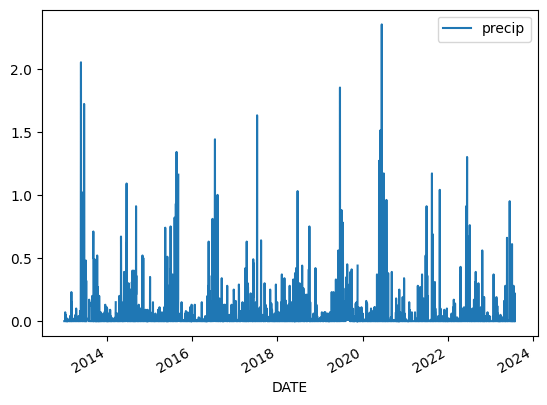

In [445]:
Calgary1_df[["precip"]].plot()

<Axes: xlabel='DATE'>

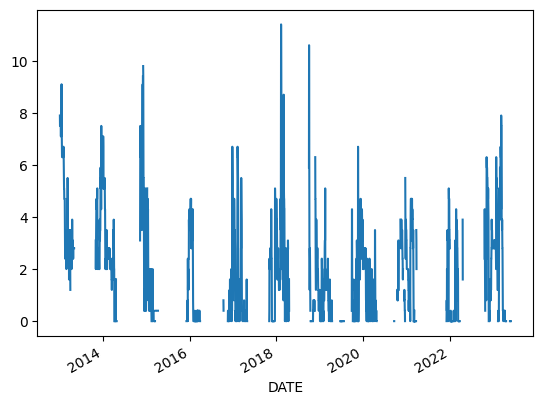

In [446]:
Calgary1_df["snow_depth"].plot()

more than 6inches of snow  are present  with the highest more than 10inches in 2018. 2020 has 6inches 

In [447]:
#tomorrows temp_max	

In [448]:
#fill all  values with the previous ones in temp_max and temp_min and others. this is called forward fill
Calgary1c_df = Calgary1_df.fillna(method="ffill")

In [449]:
Calgary1c_df.head()

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2013-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,7.9,34.0,17.0
2013-01-02,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,7.5,42.0,13.0
2013-01-03,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,7.5,47.0,17.0
2013-01-04,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,7.5,37.0,12.0
2013-01-05,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,7.5,41.0,13.0


In [450]:
#tomorrows temp_max	

analysing weather data

<Axes: xlabel='DATE'>

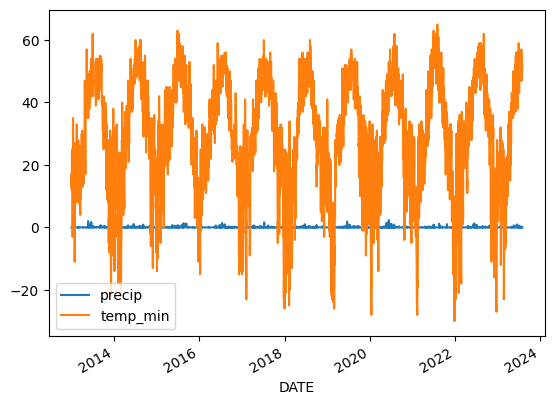

In [451]:
Calgary1c_df[["precip","temp_min"]].plot()

<Axes: xlabel='DATE'>

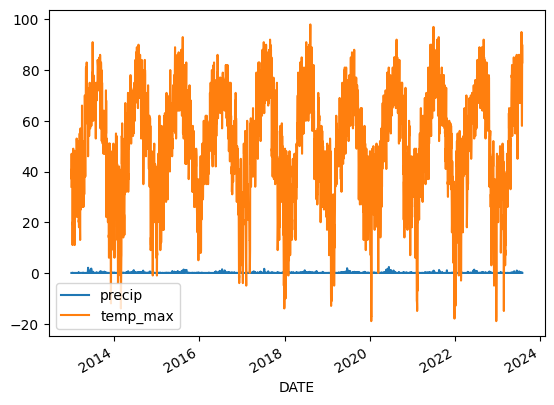

In [452]:
Calgary1c_df[["precip","temp_max"]].plot()

<Axes: xlabel='DATE'>

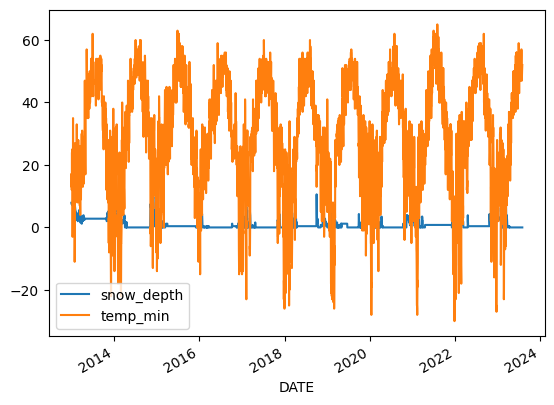

In [453]:
Calgary1c_df[["snow_depth","temp_min"]].plot()

<Axes: xlabel='DATE'>

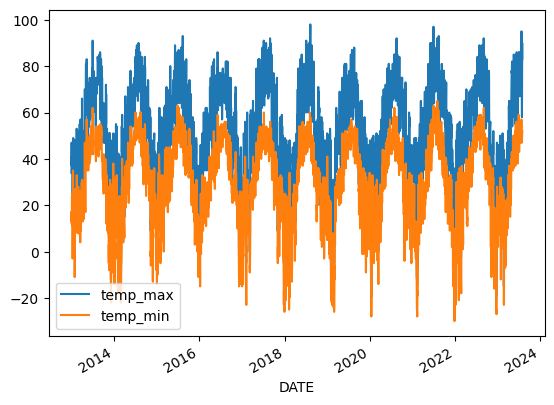

In [454]:
Calgary1c_df[["temp_max","temp_min"]].plot()

<Axes: xlabel='DATE'>

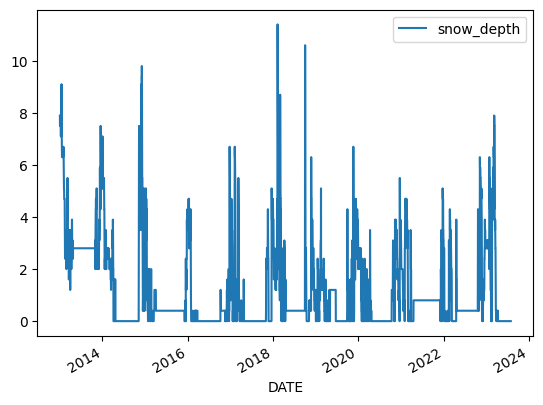

In [455]:
# plot of snow_depth after filling
Calgary1c_df[["snow_depth"]].plot()

<Axes: xlabel='DATE'>

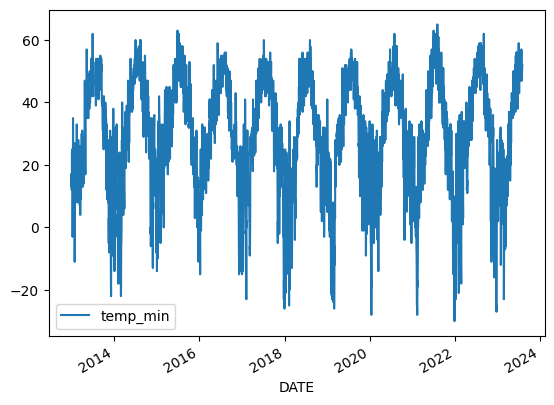

In [456]:
Calgary1c_df[["temp_min"]].plot()

In [457]:
# checking total weather condition per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2013,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",16.09,1168.8,16326.0,9300.0
2014,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",14.51,493.8,18147.0,10741.0
2015,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",25.90,239.2,19518.0,11657.0
2016,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",16.34,184.0,18921.0,11047.0
2017,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",13.43,255.6,18771.0,10453.0
2018,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",13.24,466.6,18071.0,9790.0
2019,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",16.88,331.5,17630.0,9850.0
2020,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",18.83,268.4,18533.0,10480.0
2021,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",10.89,399.9,19008.0,10441.0


In [458]:
#snow-depth per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()["snow_depth"]

DATE
2013    1168.8
2014     493.8
2015     239.2
2016     184.0
2017     255.6
2018     466.6
2019     331.5
2020     268.4
2021     399.9
2022     340.3
2023     281.9
Name: snow_depth, dtype: float64

In [459]:
#prep per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()["precip"]

DATE
2013    16.09
2014    14.51
2015    25.90
2016    16.34
2017    13.43
2018    13.24
2019    16.88
2020    18.83
2021    10.89
2022    12.98
2023     6.48
Name: precip, dtype: float64

training machine tearning data set

target variable= temp_min while others are the predictors

In [460]:
Calgary1c_df["target"] = Calgary1c_df. shift(-1)["temp_max"]

In [461]:
Calgary1c_df

,STATION,Name,precip,snow_depth,temp_max,temp_min,target
DATE,,,,,,,
2013-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.9,34.0,17.0,42.0
2013-01-02,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,42.0,13.0,47.0
2013-01-03,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,47.0,17.0,37.0
2013-01-04,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,37.0,12.0,41.0
2013-01-05,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,41.0,13.0,41.0
...,...,...,...,...,...,...,...
2023-07-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.10,0.0,65.0,47.0,58.0
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,0.0,58.0,49.0,77.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,77.0,50.0,90.0


 the above predicted tomorrows temp-max from today eg the target (47 ferheight) of 2013-01-02 is tomorrows temp_max (47). it helps predict tomorrows maximum temp.

Notice the last target for 2023-07-31 has NAN this is because the last data i downloaded was on that day,we will can fill the data with the previous value. ((   'r' in Calgary1cf_df mean fill))

In [462]:
Calgary1cf_df= Calgary1c_df.ffill()

In [463]:
Calgary1cf_df

,STATION,Name,precip,snow_depth,temp_max,temp_min,target
DATE,,,,,,,
2013-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.9,34.0,17.0,42.0
2013-01-02,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,42.0,13.0,47.0
2013-01-03,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,47.0,17.0,37.0
2013-01-04,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,37.0,12.0,41.0
2013-01-05,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,41.0,13.0,41.0
...,...,...,...,...,...,...,...
2023-07-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.10,0.0,65.0,47.0,58.0
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,0.0,58.0,49.0,77.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,77.0,50.0,90.0


In [464]:
Calgary1cfs_df= Calgary1cf_df[['precip','snow_depth','temp_max','temp_min','target']]

In [465]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target
DATE,,,,,
2013-01-01,0.00,7.9,34.0,17.0,42.0
2013-01-02,0.00,7.5,42.0,13.0,47.0
2013-01-03,0.00,7.5,47.0,17.0,37.0
2013-01-04,0.00,7.5,37.0,12.0,41.0
2013-01-05,0.00,7.5,41.0,13.0,41.0
...,...,...,...,...,...
2023-07-27,0.10,0.0,65.0,47.0,58.0
2023-07-28,0.22,0.0,58.0,49.0,77.0
2023-07-29,0.00,0.0,77.0,50.0,90.0


In [466]:
#Compute the correlation matrix
corr= Calgary1cfs_df.corr()
corr

,precip,snow_depth,temp_max,temp_min,target
precip,1.000000,-0.050458,0.037177,0.147119,0.051883
snow_depth,-0.050458,1.000000,-0.495221,-0.520200,-0.457914
temp_max,0.037177,-0.495221,1.000000,0.919402,0.899733
temp_min,0.147119,-0.520200,0.919402,1.000000,0.859728
target,0.051883,-0.457914,0.899733,0.859728,1.000000


explain correllation.

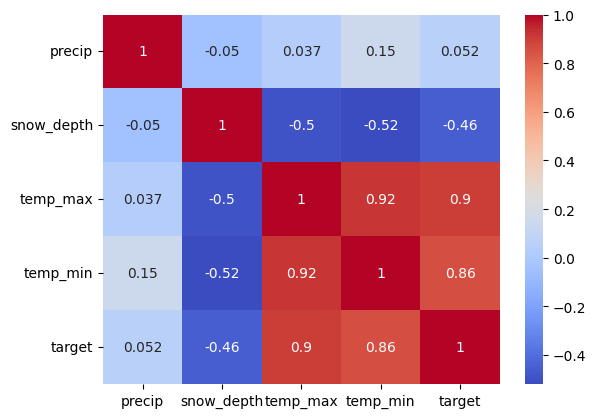

In [467]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix


# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Application of machine learning.
ridge regression model penalizez coefficients to account for multi-collinearity.

use regression model because it reduces overfitting

In [468]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [469]:
# Create a Ridge Regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha (regularization strength) default value


In [470]:
# select columns in this list except the target.~ mean negation.
predictors = Calgary1cfs_df.columns[~Calgary1cfs_df.columns.isin(["target"])] 
predictors

Index(['precip', 'snow_depth', 'temp_max', 'temp_min'], dtype='object')

since it is a time series data, we will use time series cross validation or back testing to account for the time series nature of the data.. we have to be careful not to use today's  value to predict yesterday.

In [471]:
# the function  take in the data, model, predictors, start parameter  of 365 days before we start predictions and this is for a period of 30 days we create a set of predictions and move on to the next 30 days.. this can be adjusted.
def backtest(Calgary1cfs_df,ridge_model,predictors,start=365,step=30):
    all_predictions=[]

    for i in range(start, Calgary1cfs_df.shape[0], step):
        train = Calgary1cfs_df.iloc[:i,:]
        test = Calgary1cfs_df.iloc[i:i+step,:]

        ridge_model.fit(train[predictors], train["target"])

        preds =ridge_model.predict(test[predictors])

        preds  = pd.Series(preds, index=test.index)

        combined= pd.concat([test["target"],preds], axis=1)
        combined.columns= ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)
        return pd.concat(all_predictions)

In [472]:
predictions = backtest(Calgary1cfs_df, ridge_model, predictors)

In [473]:
predictions

,actual,prediction,diff
DATE,,,
2014-02-08,-1.0,9.127644,10.127644
2014-02-09,6.0,4.702100,1.297900
2014-02-10,2.0,7.748312,5.748312
2014-02-11,25.0,9.133582,15.866418
2014-02-12,42.0,22.227957,19.772043
2014-02-13,40.0,37.956757,2.043243
2014-02-14,41.0,39.556590,1.443410
2014-02-15,39.0,40.901597,1.901597
2014-02-16,40.0,40.265124,0.265124


The diff show the  how accurate our prediction is we will immport mean_absolute_error

In [474]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [475]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

8.834093508272641

In [476]:
predictions["diff"].mean()

8.834093508272641

on average, we are 8.8 degrees off in our prediction.

In [477]:
r2_ridge = r2_score(predictions["actual"], predictions["prediction"])
r2_ridge

0.6209632898711315

In [478]:
#combined.plot()

In [479]:
rmse_ridge = mean_squared_error(predictions["actual"], predictions["prediction"], squared=False)
rmse_ridge

11.637902151094432

In [480]:
ridge_model.coef_

array([-2.54469502,  0.17808088,  0.5520832 ,  0.39646166])

These coefficients indicate the direction and magnitude of the relationship between each predictor and the target variable 
For the 'precip' predictor,Coefficient is -2.54469502 and this is associated with a decrease of approximately -2.54 units in the target variable (assuming all other predictors are held constant).
For the 'snow_depth' predictor, the Coefficient is 0.17808088 and it shows positive relationship increase of approximately 0.18 units in the target variable (assuming all other predictors are held constant).
For the 'temp_max' predictor, the Coefficient is 0.5520832 and shows a unit increase in 'temp_max' is associated with an increase of approximately 0.55 units in the target variable 
For the 'temp_min' predictor, the Coefficient is 0.39646166 indicates a unit increase in 'temp_min' is associated with an increase of approximately 0.40 units in the target variable (assuming all other predictors are held constant).

===========================================================================================================================
===========================================================================================================================

how to improve our accuracy. calculate the average temperature and precipitation in the past few days, 3,14 days and looking how the current day compare to those days.

d

In [481]:
def pct_diff(old, new):
    return (new - old) / old  # return new minus old divided by old.

def compute_rolling(Calgary1cfs_df, horizon, col):
    label = f"rolling_{horizon}_{col}"  # to create a label.... used to create a dynamic string
    Calgary1cfs_df[label] = Calgary1cfs_df[col].rolling(horizon).mean()  # note that rolling mean takes the values from previous dates to calculate over the horizon
    Calgary1cfs_df[f"{label}_pct"] = pct_diff(Calgary1cfs_df[label], Calgary1cfs_df[col])  # to find percentage difference between the current day and the rolling

rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["precip", "snow_depth", "temp_max", "temp_min"]:
        compute_rolling(Calgary1cfs_df, horizon, col)
        
Calgary1cfs_df


C:\Users\layin\AppData\Local\Temp\ipykernel_35680\2205066882.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Calgary1cfs_df[label] = Calgary1cfs_df[col].rolling(horizon).mean()  # note that rolling mean takes the values from previous dates to calculate over the horizon


,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_3_temp_min,rolling_3_temp_min_pct,rolling_14_precip,rolling_14_precip_pct,rolling_14_snow_depth,rolling_14_snow_depth_pct,rolling_14_temp_max,rolling_14_temp_max_pct,rolling_14_temp_min,rolling_14_temp_min_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.00,7.9,34.0,17.0,42.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.00,7.5,42.0,13.0,47.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.00,7.5,47.0,17.0,37.0,0.000000,NaN,7.633333,-0.017467,41.000000,...,15.666667,0.085106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,0.00,7.5,37.0,12.0,41.0,0.000000,NaN,7.500000,0.000000,42.000000,...,14.000000,-0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05,0.00,7.5,41.0,13.0,41.0,0.000000,NaN,7.500000,0.000000,41.666667,...,14.000000,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-27,0.10,0.0,65.0,47.0,58.0,0.033333,2.0000,0.000000,NaN,73.000000,...,50.000000,-0.060000,0.032857,2.043478,0.0,NaN,79.000000,-0.177215,52.285714,-0.101093
2023-07-28,0.22,0.0,58.0,49.0,77.0,0.106667,1.0625,0.000000,NaN,66.000000,...,48.000000,0.020833,0.048571,3.529412,0.0,NaN,77.857143,-0.255046,51.928571,-0.056396
2023-07-29,0.00,0.0,77.0,50.0,90.0,0.106667,-1.0000,0.000000,NaN,66.666667,...,48.666667,0.027397,0.045714,-1.000000,0.0,NaN,77.785714,-0.010101,51.642857,-0.031812


cut off the first 14 days with missing valuea because there is no prediction for them.

In [482]:
Calgary1cfs_df = Calgary1cfs_df.iloc[14:,:]

In [483]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_3_temp_min,rolling_3_temp_min_pct,rolling_14_precip,rolling_14_precip_pct,rolling_14_snow_depth,rolling_14_snow_depth_pct,rolling_14_temp_max,rolling_14_temp_max_pct,rolling_14_temp_min,rolling_14_temp_min_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2013-01-15,0.00,9.1,46.0,35.0,44.0,0.023333,-1.0000,7.900000,0.151899,34.000000,...,17.666667,0.981132,0.010000,-1.000000,7.528571,0.208729,34.142857,0.347280,13.285714,1.634409
2013-01-16,0.00,7.1,44.0,23.0,49.0,0.006667,-1.0000,7.900000,-0.101266,42.333333,...,23.000000,0.000000,0.010000,-1.000000,7.500000,-0.053333,34.285714,0.283333,14.000000,0.642857
2013-01-17,0.00,7.1,49.0,20.0,46.0,0.000000,NaN,7.766667,-0.085837,46.333333,...,26.000000,-0.230769,0.010000,-1.000000,7.471429,-0.049713,34.428571,0.423237,14.214286,0.407035
2013-01-18,0.00,6.7,46.0,27.0,29.0,0.000000,NaN,6.966667,-0.038278,46.333333,...,23.333333,0.157143,0.010000,-1.000000,7.414286,-0.096339,35.071429,0.311609,15.285714,0.766355
2013-01-19,0.00,6.3,29.0,14.0,14.0,0.000000,NaN,6.700000,-0.059701,41.333333,...,20.333333,-0.311475,0.010000,-1.000000,7.328571,-0.140351,34.214286,-0.152401,15.357143,-0.088372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-27,0.10,0.0,65.0,47.0,58.0,0.033333,2.0000,0.000000,NaN,73.000000,...,50.000000,-0.060000,0.032857,2.043478,0.000000,NaN,79.000000,-0.177215,52.285714,-0.101093
2023-07-28,0.22,0.0,58.0,49.0,77.0,0.106667,1.0625,0.000000,NaN,66.000000,...,48.000000,0.020833,0.048571,3.529412,0.000000,NaN,77.857143,-0.255046,51.928571,-0.056396
2023-07-29,0.00,0.0,77.0,50.0,90.0,0.106667,-1.0000,0.000000,NaN,66.666667,...,48.666667,0.027397,0.045714,-1.000000,0.000000,NaN,77.785714,-0.010101,51.642857,-0.031812


some NAN is still in the percentage columns(pct)  and we have to solve them by filling them with 0 in the next cell

In [484]:
Calgary1cfs_df =Calgary1cfs_df.fillna(0)

Add more predictions

In [485]:
def expand_mean(x):
    return x.expanding(1).mean()

for col in ["precip", "snow_depth", "temp_max", "temp_min"]:
    Calgary1cfs_df[f"month_avg_{col}"] = Calgary1cfs_df.groupby(Calgary1cfs_df.index.month)[col].apply(expand_mean).reset_index(level=0, drop=True)#(drop original index so it aligns with original df when assigning values back)
    Calgary1cfs_df[f"day_avg_{col}"] = Calgary1cfs_df.groupby(Calgary1cfs_df.index.day_of_year)[col].apply(expand_mean).reset_index(level=0, drop=True)


In [486]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_14_temp_min,rolling_14_temp_min_pct,month_avg_precip,day_avg_precip,month_avg_snow_depth,day_avg_snow_depth,month_avg_temp_max,day_avg_temp_max,month_avg_temp_min,day_avg_temp_min
DATE,,,,,,,,,,,,,,,,,,,,,
2013-01-15,0.00,9.1,46.0,35.0,44.0,0.023333,-1.0000,7.900000,0.151899,34.000000,...,13.285714,1.634409,0.000000,0.000,9.100000,9.10,46.000000,46.0,35.000000,35.0
2013-01-16,0.00,7.1,44.0,23.0,49.0,0.006667,-1.0000,7.900000,-0.101266,42.333333,...,14.000000,0.642857,0.000000,0.000,8.100000,7.10,45.000000,44.0,29.000000,23.0
2013-01-17,0.00,7.1,49.0,20.0,46.0,0.000000,0.0000,7.766667,-0.085837,46.333333,...,14.214286,0.407035,0.000000,0.000,7.766667,7.10,46.333333,49.0,26.000000,20.0
2013-01-18,0.00,6.7,46.0,27.0,29.0,0.000000,0.0000,6.966667,-0.038278,46.333333,...,15.285714,0.766355,0.000000,0.000,7.500000,6.70,46.250000,46.0,26.250000,27.0
2013-01-19,0.00,6.3,29.0,14.0,14.0,0.000000,0.0000,6.700000,-0.059701,41.333333,...,15.357143,-0.088372,0.000000,0.000,7.260000,6.30,42.800000,29.0,23.800000,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-27,0.10,0.0,65.0,47.0,58.0,0.033333,2.0000,0.000000,0.000000,73.000000,...,52.285714,-0.101093,0.076242,0.044,0.322293,0.20,75.359873,75.9,51.356688,50.2
2023-07-28,0.22,0.0,58.0,49.0,77.0,0.106667,1.0625,0.000000,0.000000,66.000000,...,51.928571,-0.056396,0.076698,0.025,0.321270,0.48,75.304762,75.7,51.349206,50.3
2023-07-29,0.00,0.0,77.0,50.0,90.0,0.106667,-1.0000,0.000000,0.000000,66.666667,...,51.642857,-0.031812,0.076456,0.014,0.320253,0.48,75.310127,78.9,51.344937,51.2


Rerun our predictors, we have included some predictors lets see in our index.

In [487]:
#we can check our predictors now. .~ mean negation.
predictors = Calgary1cfs_df.columns[~Calgary1cfs_df.columns.isin(["target"])] 
predictors

Index(['precip', 'snow_depth', 'temp_max', 'temp_min', 'rolling_3_precip',
       'rolling_3_precip_pct', 'rolling_3_snow_depth',
       'rolling_3_snow_depth_pct', 'rolling_3_temp_max',
       'rolling_3_temp_max_pct', 'rolling_3_temp_min',
       'rolling_3_temp_min_pct', 'rolling_14_precip', 'rolling_14_precip_pct',
       'rolling_14_snow_depth', 'rolling_14_snow_depth_pct',
       'rolling_14_temp_max', 'rolling_14_temp_max_pct', 'rolling_14_temp_min',
       'rolling_14_temp_min_pct', 'month_avg_precip', 'day_avg_precip',
       'month_avg_snow_depth', 'day_avg_snow_depth', 'month_avg_temp_max',
       'day_avg_temp_max', 'month_avg_temp_min', 'day_avg_temp_min'],
      dtype='object')

predictors

In [488]:
 #Check for infinity values in each column
inf_columns =Calgary1cfs_df.columns[Calgary1cfs_df.applymap(np.isinf).any()]


inf_columns

Index(['rolling_3_temp_max_pct', 'rolling_3_temp_min_pct',
       'rolling_14_temp_min_pct'],
      dtype='object')

it needs cleaning because of this infinity in the columns, so it has to be dealth with by fill for our backtesting function to work. this ts done in the next cell.

In [489]:


Calgary1cfs_df = Calgary1cfs_df.replace([np.inf, -np.inf], np.nan)# code replace all infinite values with NAN using replace and then fill  with previous non nan value along the columns.
Calgary1cfs_df = Calgary1cfs_df.ffill()


In [490]:
Calgary1cfs_df.apply(pd.isnull).sum()

precip                       0
snow_depth                   0
temp_max                     0
temp_min                     0
target                       0
rolling_3_precip             0
rolling_3_precip_pct         0
rolling_3_snow_depth         0
rolling_3_snow_depth_pct     0
rolling_3_temp_max           0
rolling_3_temp_max_pct       0
rolling_3_temp_min           0
rolling_3_temp_min_pct       0
rolling_14_precip            0
rolling_14_precip_pct        0
rolling_14_snow_depth        0
rolling_14_snow_depth_pct    0
rolling_14_temp_max          0
rolling_14_temp_max_pct      0
rolling_14_temp_min          0
rolling_14_temp_min_pct      0
month_avg_precip             0
day_avg_precip               0
month_avg_snow_depth         0
day_avg_snow_depth           0
month_avg_temp_max           0
day_avg_temp_max             0
month_avg_temp_min           0
day_avg_temp_min             0
dtype: int64

In [491]:
# backtest function to call our predictions
predictions = backtest(Calgary1cfs_df, ridge_model, predictors)

In [492]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_14_temp_min,rolling_14_temp_min_pct,month_avg_precip,day_avg_precip,month_avg_snow_depth,day_avg_snow_depth,month_avg_temp_max,day_avg_temp_max,month_avg_temp_min,day_avg_temp_min
DATE,,,,,,,,,,,,,,,,,,,,,
2013-01-15,0.00,9.1,46.0,35.0,44.0,0.023333,-1.0000,7.900000,0.151899,34.000000,...,13.285714,1.634409,0.000000,0.000,9.100000,9.10,46.000000,46.0,35.000000,35.0
2013-01-16,0.00,7.1,44.0,23.0,49.0,0.006667,-1.0000,7.900000,-0.101266,42.333333,...,14.000000,0.642857,0.000000,0.000,8.100000,7.10,45.000000,44.0,29.000000,23.0
2013-01-17,0.00,7.1,49.0,20.0,46.0,0.000000,0.0000,7.766667,-0.085837,46.333333,...,14.214286,0.407035,0.000000,0.000,7.766667,7.10,46.333333,49.0,26.000000,20.0
2013-01-18,0.00,6.7,46.0,27.0,29.0,0.000000,0.0000,6.966667,-0.038278,46.333333,...,15.285714,0.766355,0.000000,0.000,7.500000,6.70,46.250000,46.0,26.250000,27.0
2013-01-19,0.00,6.3,29.0,14.0,14.0,0.000000,0.0000,6.700000,-0.059701,41.333333,...,15.357143,-0.088372,0.000000,0.000,7.260000,6.30,42.800000,29.0,23.800000,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-27,0.10,0.0,65.0,47.0,58.0,0.033333,2.0000,0.000000,0.000000,73.000000,...,52.285714,-0.101093,0.076242,0.044,0.322293,0.20,75.359873,75.9,51.356688,50.2
2023-07-28,0.22,0.0,58.0,49.0,77.0,0.106667,1.0625,0.000000,0.000000,66.000000,...,51.928571,-0.056396,0.076698,0.025,0.321270,0.48,75.304762,75.7,51.349206,50.3
2023-07-29,0.00,0.0,77.0,50.0,90.0,0.106667,-1.0000,0.000000,0.000000,66.666667,...,51.642857,-0.031812,0.076456,0.014,0.320253,0.48,75.310127,78.9,51.344937,51.2


In [493]:
mean_absolute_error(predictions["actual"], predictions["prediction"])


9.896833776164554

In [494]:
r2_ridge = r2_score(predictions["actual"], predictions["prediction"])
r2_ridge

0.600319001699866

In [495]:
rmse_ridge = mean_squared_error(predictions["actual"], predictions["prediction"], squared=False)
rmse_ridge

13.00566103397314

In [496]:
predictions["diff"].mean()

9.896833776164554

In [497]:
ridge_model.coef_

array([-2.13984149e+00,  1.52336564e+01,  6.34148745e-01, -3.79864135e-01,
        1.60930877e+00, -8.21038852e-01, -7.39205350e+00, -2.03679142e+01,
        3.41687268e-03,  4.10039627e-01,  3.96741549e-02,  1.50304432e-01,
       -7.71086161e+00, -7.99058076e-01, -4.47531260e+00, -1.39606892e+01,
       -1.91520659e-01,  5.28881639e+00,  7.49815536e-01, -3.42893528e-02,
        1.87494762e+01,  1.08770486e+00,  1.28196881e+00, -3.69800624e+00,
        7.23742156e-01, -3.94634828e-01, -9.00318798e-01,  6.60108768e-01])

In [498]:
predictions.sort_values("diff", ascending= False) # to sshow days with errors

,actual,prediction,diff
DATE,,,
2014-02-28,-14.0,17.081970,31.081970
2014-03-06,31.0,5.047824,25.952176
2014-03-07,54.0,28.418626,25.581374
2014-02-27,7.0,30.540785,23.540785
2014-03-20,14.0,36.528320,22.528320
2014-03-15,53.0,37.307103,15.692897
2014-03-11,59.0,43.526875,15.473125
2014-03-10,48.0,33.359499,14.640501
2014-03-14,50.0,37.357355,12.642645


In [499]:
Calgary1cfs_df.loc["2014-02-24":"2014-03-02"]

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_14_temp_min,rolling_14_temp_min_pct,month_avg_precip,day_avg_precip,month_avg_snow_depth,day_avg_snow_depth,month_avg_temp_max,day_avg_temp_max,month_avg_temp_min,day_avg_temp_min
DATE,,,,,,,,,,,,,,,,,,,,,
2014-02-24,0.01,2.4,15.0,-18.0,21.0,0.016667,-0.4,2.533333,-0.052632,8.333333,...,8.428571,-3.135593,0.004808,0.005,3.286538,2.95,30.288462,30.5,11.557692,0.5
2014-02-25,0.00,2.4,21.0,-7.0,34.0,0.010000,-1.0,2.533333,-0.052632,12.000000,...,8.428571,-1.830508,0.004717,0.020,3.269811,2.20,30.113208,31.0,11.207547,8.0
2014-02-26,0.00,2.4,34.0,11.0,29.0,0.003333,-1.0,2.400000,0.000000,23.333333,...,9.642857,0.140741,0.004630,0.010,3.253704,2.75,30.185185,30.0,11.203704,14.5
2014-02-27,0.00,2.4,29.0,6.0,7.0,0.000000,0.0,2.400000,0.000000,28.000000,...,9.357143,-0.358779,0.004545,0.000,3.238182,2.75,30.163636,34.5,11.109091,12.5
2014-02-28,0.00,2.0,7.0,-17.0,-14.0,0.000000,0.0,2.266667,-0.117647,23.333333,...,6.928571,-3.453608,0.004464,0.000,3.216071,2.55,29.750000,25.5,10.607143,2.5
2014-03-01,0.01,2.0,-14.0,-22.0,-8.0,0.003333,2.0,2.133333,-0.062500,7.333333,...,4.000000,-6.500000,0.012813,0.005,3.115625,2.20,34.156250,19.0,15.875000,3.0
2014-03-02,0.00,2.0,-8.0,-22.0,-2.0,0.003333,-1.0,2.000000,0.000000,-5.000000,...,1.000000,-23.000000,0.012424,0.000,3.081818,2.75,32.878788,13.0,14.727273,0.5


In [500]:
predictions["diff"].round().value_counts().sort_index()

diff
0.0     2
1.0     2
2.0     3
3.0     2
5.0     3
6.0     1
7.0     2
9.0     3
10.0    1
12.0    1
13.0    2
15.0    2
16.0    1
23.0    1
24.0    1
26.0    2
31.0    1
Name: count, dtype: int64

<Axes: xlabel='diff'>

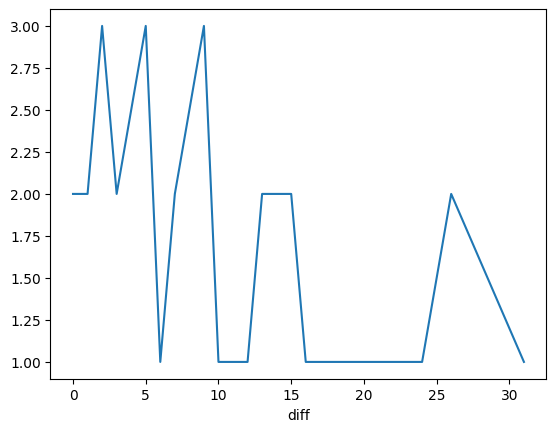

In [501]:
predictions["diff"].round().value_counts().sort_index().plot()

conclusion to improve the model, we always create more columns , add to the predictors and run it.

little variations occured as we can see.

In [502]:
ridge_model.coef_

array([-2.13984149e+00,  1.52336564e+01,  6.34148745e-01, -3.79864135e-01,
        1.60930877e+00, -8.21038852e-01, -7.39205350e+00, -2.03679142e+01,
        3.41687268e-03,  4.10039627e-01,  3.96741549e-02,  1.50304432e-01,
       -7.71086161e+00, -7.99058076e-01, -4.47531260e+00, -1.39606892e+01,
       -1.91520659e-01,  5.28881639e+00,  7.49815536e-01, -3.42893528e-02,
        1.87494762e+01,  1.08770486e+00,  1.28196881e+00, -3.69800624e+00,
        7.23742156e-01, -3.94634828e-01, -9.00318798e-01,  6.60108768e-01])

These coefficients represent the estimated impact of each predictor on the target variable (temp_min)
Precipitation (precip): 9.52623501 This indicate a positive coefficient indicates that an increase in precipitation is associated with an increase in the temp_min.
Analysis: This suggests that higher levels of precipitation are correlated with higher minimum temperatures. This might be due to the fact that rainy or wet conditions can lead to a warming effect, preventing temperatures from dropping as low.
Snow Depth (snow_depth): -0.80945195 :a negative coefficient indicates that an increase in snow depth is associated with a decrease in the temp_min.
Analysis: This suggests an inverse relationship between snow depth and minimum temperature. As snow accumulates, it tends to have a cooling effect on the surrounding environment, resulting in lower minimum temperatures.
Maximum Temperature (temp_max): 0.75077928 a positive coefficient indicates that an increase in maximum temperature is associated with an increase in the temp_min.
Analysis: This suggests that higher maximum temperatures are correlated with higher minimum temperatures. Warmer days might lead to milder nights, resulting in higher minimum temperatures.

Creating functions  to make predictions(ie contain the prediction)

creating more predictors